<a href="https://colab.research.google.com/github/jumbokh/Intelligent-monitoring-class/blob/main/notebooks/Yolov3_using_Darknet_on_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 如何在 Colab 安裝 Darknet 框架訓練 YOLO v3 物件辨識並且最佳化 Colab 的訓練流程

此範例程式碼為文章「如何在 Colab 安裝 Darknet 框架訓練 YOLO v3 物件辨識並且最佳化 Colab 的訓練流程」的範例程式碼。

這篇文章會教你：
* 利用 Colab 128G RAM GPU 來訓練你的 Yolo3 模型
* 將 Colab 設定成可以運用在實際專案的訓練環境
* 快速掛載本機電腦上的檔案到 Colab 環境中
* 事先編譯所有需要的檔案，每次開啟 Colab 後即可立刻進行訓練
* 將訓練好的 weight 檔案自動同步回本機電腦，避免檔案遺失

## Step 2：連接你的 Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/gdrive') # 請點擊網址，選擇 Google 帳號登入，然後將授權碼貼回輸入框中



Mounted at /content/gdrive


In [2]:
!ln -fs /content/gdrive/My\ Drive /app

ln: failed to create symbolic link '/app/My Drive': Input/output error


## 步驟 4：下載並編譯 Darknet（只需要執行一次）

這個步驟只需要執行一次，執行過程我們會把執行檔複製到 Google Drive。之後要跑程式時，只要把執行檔複製回 Colab 環境就可以使用了。

### 4.1 下載 cuDNN 檔案

1. 申請 Nvidia 帳號，申請網址為 http://bit.ly/2qfpOPj
2. 下載 `cudnn-10.0-linux-x64-v7.5.0.56.tgz`，下載網址為 
下載 cuDNN 檔案。下載網址為：http://bit.ly/2qfpOPj
3. 將下載的檔案 `cudnn-10.0-linux-x64-v7.5.0.56.tgz` 放到 google drive 的 `darknet/cuDNN/` 目錄下。

In [3]:
!tar -xzvf /app/darknet/cuDNN/cudnn-10.0-linux-x64-v7.5.0.56.tgz -C /usr/local/
!chmod a+r /usr/local/cuda/include/cudnn.h

# 檢查是否安裝成功
!cat /usr/local/cuda/include/cudnn.h | grep CUDNN_MAJOR -A 2

cuda/include/cudnn.h
cuda/NVIDIA_SLA_cuDNN_Support.txt
cuda/lib64/libcudnn.so
cuda/lib64/libcudnn.so.7
cuda/lib64/libcudnn.so.7.5.0
cuda/lib64/libcudnn_static.a
#define CUDNN_MAJOR 7
#define CUDNN_MINOR 5
#define CUDNN_PATCHLEVEL 0
--
#define CUDNN_VERSION (CUDNN_MAJOR * 1000 + CUDNN_MINOR * 100 + CUDNN_PATCHLEVEL)

#include "driver_types.h"


### 4.2 下載並編譯 Darknet

In [4]:
!ls
!cd /content
!rm -fr darknet
!git clone https://github.com/AlexeyAB/darknet/
% cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/g' Makefile
!sed -i 's/GPU=0/GPU=1/g' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/g' Makefile
!apt update
!apt-get install libopencv-dev

darknet  darknet_source  drive	gdrive	sample_data
Cloning into 'darknet'...
remote: Enumerating objects: 15298, done.
remote: Total 15298 (delta 0), reused 0 (delta 0), pack-reused 15298
Receiving objects: 100% (15298/15298), 13.67 MiB | 18.87 MiB/s, done.
Resolving deltas: 100% (10400/10400), done.
/content/darknet
Get:1 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:2 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:4 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:5 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Hit:6 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:7 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:8 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:9 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:10 https:/

In [5]:
!apt autoremove 

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following packages will be REMOVED:
  libnvidia-common-460
0 upgraded, 0 newly installed, 1 to remove and 50 not upgraded.
After this operation, 35.8 kB disk space will be freed.
(Reading database ... 148486 files and directories currently installed.)
Removing libnvidia-common-460 (460.91.03-0ubuntu1) ...


In [6]:
# 編譯
!make 

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:946:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1147:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
             ^~
./src/image_

In [7]:

# 將編譯完成的執行檔複製回 Google Drive
!cp ./darknet /app/darknet 
!cp ./darknet /content/darknet
%cd /content

cp: './darknet' and '/content/darknet/darknet' are the same file
/content


In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 測試 Darknet 是否正常安裝

我們用 yolo 官方預先訓練好的模型來偵測範例圖片。

In [10]:
%cd /content/darknet_source
!wget https://pjreddie.com/media/files/yolov3.weights
!/content/darknet/darknet detect cfg/yolov3.cfg yolov3.weights data/person.jpg -dont-show



/content/darknet_source
--2021-08-19 06:30:18--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights.3’

yolov3.weights.3    100%[===================>] 236.52M  20.4MB/s    in 12s     

2021-08-19 06:30:31 (18.9 MB/s) - ‘yolov3.weights.3’ saved [248007048/248007048]

 CUDA-version: 11000 (11020), cuDNN: 7.5.0, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 

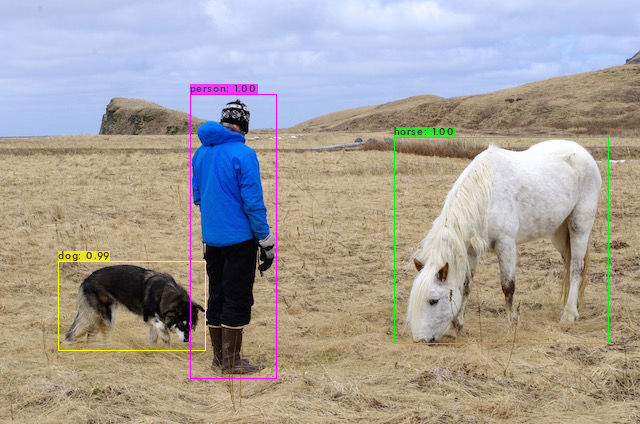

In [12]:
import cv2
from google.colab.patches import cv2_imshow
img = cv2.imread('predictions.jpg', cv2.IMREAD_UNCHANGED)
cv2_imshow(img)